<img src="https://cdn-images-1.medium.com/fit/t/1600/480/0*4sqs9CUyTjmz4Jtk">


# Market Basket Analysis - To Tackle Covid-19 Panic-buying

***
## Problem Statement

Understanding customer behaviour has always been one of the critical factors that influence the success of any business. Recent advancements in the field of data mining and machine learning have enabled businesses to identify customer buying patterns effortlessly. However, it is crucial to employ the correct data mining algorithm/technique, especially in businesses concerning a large number of customer transactions, such as the retail stores. Therefore, the primary objective of this project is to perform Market Basket Analysis on retail store data using the Python programming language.

***
## Introduction

Market Basket Analysis is one of the fundamental techniques used by established retailers to identify associations between commodities. The algorithm looks for combinations in items that occur together frequently in transactions. The approach focuses on the theory that customers who buy a particular product are more likely to buy another specific product.For Instance, customers who buy Bread usually buy Butter too. The retail stores should target customers who purchase Bread and Butter and provide an offer to them so that they buy the third item, like eggs

<img src="https://miro.medium.com/max/884/0*-xxkbIlov_6nv8hb">

So if a customer buying Bread and Butter and sees a discount on eggs, they will be encouraged to spend more and buy the eggs. This is what market basket analysis is all about.

### Real-time Applications

Insights from Market Basket Analysis helps the retailers in $^{[1]}$,

- Creating advertising procedures
- Changing the store layout according to trends
- Cross marketing on online stores
- What are the trending items customers buy
- Customized emails with add-on sales
- Customer behavior analysis
- Catalog design

***
## Process Model Description
### CRISP-DM 

In this project, we used the CRISP-DM process model. The <b>cross-industry standard process for data mining</b>, known as <b>CRISP-DM</b>, is an open standard process model that defines common procedures for data mining. It is the most widely-used analytics model $^{[2]}$.

CRISP-DM breaks the process of data mining into six major phases,
- Business understanding
- Data understanding
- Data preparation
- Modeling
- Evaluation
- Deployment

<img src='https://lh3.googleusercontent.com/proxy/SPixTPNFgC_bSzgl7BqgbR_M6q-vsIZDnVlYtLiEhJ_qOrB_d0TwJx9SnDYbjR3gBAP7NQzyF7gSpScmbXSu9asrggntOvvQve_hhYesl3bxsdZ4-L78RZTvA3MK'>




***
## 1. Business Understanding

### Objectives:

- Optimize existing stock replenishment cycle through the analysis of historic customer-transaction data
- Analyze and Identify frequently bought items
- Predict any useful associations between essential commodities 
- Will pre-order and stocking help tackling unexpected scenarios like the recent panic-buying?
- Will the same prevent customers from moving to a rival?


### Success Criteria:

Insights derived from the study should provide a strategy to, 
- Improve the sales-profit
- Offer better customer-satisfaction
- Expand the number of active customers &
- Decrease customers moving to rivals firms




<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQNsp4shSKKgSFaOzdbRbGwDeeYu55nt0TzjDOQ9T-WBXDPVK55&usqp=CAU'>

***
## 2. Data Understanding

### Resources:
- <b>Dataset</b>: Groceries Market Basket Data
- Dataset Available @ https://www.kaggle.com/irfanasrullah/groceries/kernels
- <b>Computing Software</b>: IBM Watson Studio
- <b>Programming Language</b>: Python 3.6
- <b>Data Mining Technique</b>: Market Basket Analysis
- <b>Machine learning Algorithm</b>: Apriori association algorithm

### Dataset Description:


In [2]:
# Import necessary packages - numpy and pandas
import numpy as np 
!pip install "pandas<0.25.0"
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
# @hidden_cell
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9d62bb1f042e4971ada55eb0091eb514 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='f6l4SyU6cHyxL8YQVVkb4MPrxOwdyph_LWmsr5Ps4kxy',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9d62bb1f042e4971ada55eb0091eb514.get_object(Bucket='pythongroupassignment-donotdelete-pr-b42htcvyumkpib',Key='groceries - groceries.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


In [4]:
#Dataset 'groceries - groceries.csv' is loaded from IBM's Data Asset
#Loading data into a panda's dataframe
df= pd.read_csv(body)
df.head(5)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Dataframe fields & their types
print(df.dtypes.head(5))


Item(s)     int64
Item 1     object
Item 2     object
Item 3     object
Item 4     object
dtype: object


### Descriptive Statistics

In [6]:
#Descriptive Statistics
print(df.describe())

#Total No. of Customer Transactions
print("\nNumber of Transactions : " + str(len(df.index)))

           Item(s)
count  9835.000000
mean      4.409456
std       3.589385
min       1.000000
25%       2.000000
50%       3.000000
75%       6.000000
max      32.000000

Number of Transactions : 9835


### Data Quality & Requirements
<b>Requirements</b>
- Ensure Data privacy & 
- Accuracy of data

<b> Missing Values</b>:
- Missing values in the dataset are represented as <b>'NaN'</b>
- These missing values are <b>ignored</b> during data processing.

***
## 3. Data Preparation

### Data Structures:
The data is processed using the following data structures,
- Pandas Dataframe
- Numpy Arrays &
- Dictionaries

### Missing Data Handling:
The missing values (NaN) are removed using the <b>dropna()</b> function of Pandas


In [7]:
# @hidden_cell
client_9d62bb1f042e4971ada55eb0091eb514 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='f6l4SyU6cHyxL8YQVVkb4MPrxOwdyph_LWmsr5Ps4kxy',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9d62bb1f042e4971ada55eb0091eb514.get_object(Bucket='pythongroupassignment-donotdelete-pr-b42htcvyumkpib',Key='groceries2.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df2 = pd.read_excel(body)

In [8]:
# To measure the frequency of items purchased, we must alter the dataframe to display all items in one column 
# Using the user-added column Transaction Number as an id column, we can use the melt function to collapse the dataframe 
# Then we remove null values using the dropna function
concat_df = pd.melt(df2, id_vars=['Transaction Number'], value_name='Items').drop('variable', axis=1) 
concat_df = concat_df.dropna().sort_values('Transaction Number')


### Statistical Analysis:
 
 ### 1. Analysis of Customer Buying Patterns 

Frequencies:

1     2159
2     1643
3     1299
4     1005
5      855
6      645
7      545
8      438
9      350
10     246
Name: Item(s), dtype: int64


Visualization:



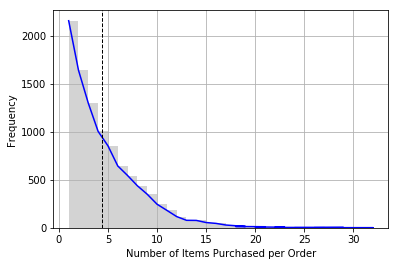


Intrepretation:

- Min. no. of Items per Order: 1
- Max. no. of Items per Order: 32
- Avg. no. of Items per Order: 4


In [9]:
# First we analyze how many items are purchased in a trip by frequency using pandas
frequency = df['Item(s)'].value_counts()
print('Frequencies:\n')
print(frequency.head(10))

# Next we use matplotlib's plot function to generate a plot of frequency for more clarity
df['Item(s)'].hist(bins=np.arange(1,31,1),color='lightgrey') 
plt.plot(frequency,color='blue')
plt.xlabel('Number of Items Purchased per Order') 
plt.ylabel('Frequency') 
plt.axvline(df['Item(s)'].mean(),color='black',linestyle='dashed', linewidth=1)
print('\n\nVisualization:\n')
plt.show() 


# Now we calculate the descriptive statistics of items in a basket
print('\nIntrepretation:\n')
print('- Min. no. of Items per Order:',df['Item(s)'].min())
print('- Max. no. of Items per Order:',df['Item(s)'].max())
print('- Avg. no. of Items per Order:',round(df['Item(s)'].mean()))

### 2. Top 10 Most Frequently Bought Item


Frequencies:

whole milk          2513
other vegetables    1903
rolls/buns          1809
soda                1715
yogurt              1372
bottled water       1087
root vegetables     1072
tropical fruit      1032
shopping bags        969
sausage              924
Name: Items, dtype: int64


Visualization:


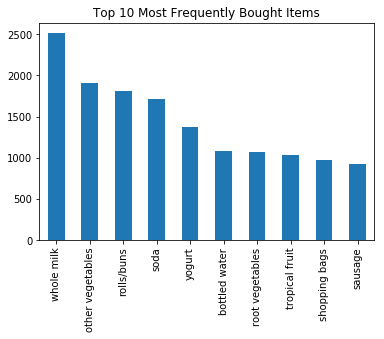

In [10]:
# Now that the dataframe is in an appropriate format, we can use the value_counts function to display the frequency 
# of items purchased in the dataset
print('\nFrequencies:\n')
print(concat_df['Items'].value_counts().head(10))
concat_df['Items'].value_counts().head(10).plot('bar')

print('\n\nVisualization:')
plt.title('Top 10 Most Frequently Bought Items')
plt.show()

### 3. Top 10 Least Frequently Bought Items


Frequencies:

make up remover          8
salad dressing           8
toilet cleaner           7
baby cosmetics           6
frozen chicken           6
kitchen utensil          4
bags                     4
preservation products    2
sound storage medium     1
baby food                1
Name: Items, dtype: int64


Visualization:



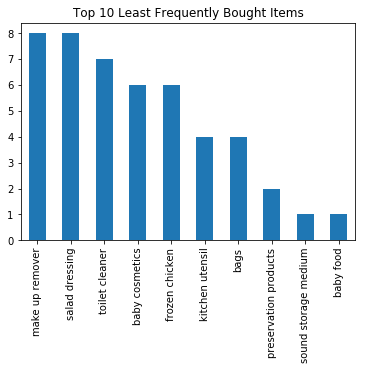

In [11]:
print('\nFrequencies:\n')
print(concat_df['Items'].value_counts().tail(10))

print('\n\nVisualization:\n')
concat_df['Items'].value_counts().tail(10).plot('bar')
plt.title('Top 10 Least Frequently Bought Items')
plt.show()

### 4. Top 5 Categories of Groceries

In [12]:
# @hidden_cell
client_9d62bb1f042e4971ada55eb0091eb514 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='f6l4SyU6cHyxL8YQVVkb4MPrxOwdyph_LWmsr5Ps4kxy',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')


body = client_9d62bb1f042e4971ada55eb0091eb514.get_object(Bucket='pythongroupassignment-donotdelete-pr-b42htcvyumkpib',Key='grocery_categories.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Categories = pd.read_excel(body)
print('\nSample Grocery Category Data:')
df_Categories.head(5)


Sample Grocery Category Data:


,Items,Category
0,citrus fruit,Produce
1,margarine,Bread & Bakery
2,ready soups,Canned Goods & Soups
3,semi-finished bread,Bread & Bakery
4,yogurt,"Dairy, Eggs & Cheese"



Frequencies:

Dairy, Eggs & Cheese    7766
Bread & Bakery          6874
Produce                 6758
Meat & Seafood          4190
Beverages               4070
Name: Category, dtype: int64


Visualization:


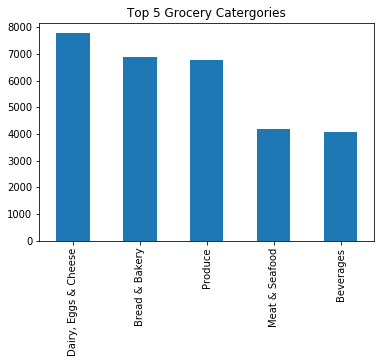

In [13]:
#Creating dictionary for the Grocery Category dataand it's associated Category
data_dict = dict(df_Categories.values.tolist())
concat_df['Category']= concat_df['Items'].map(data_dict) 

print('\nFrequencies:\n')
print(concat_df['Category'].value_counts().head(5))

print('\n\nVisualization:')
concat_df['Category'].value_counts().head(5).plot('bar')
plt.title('Top 5 Grocery Catergories')
plt.show()


***
## 4. Modeling

### FP Growth Association Algorithm
The FP algorithm is an improvement to the Apriori method. In this, a frequent pattern is generated without the need for candidate generation. It represents the database in the form of a tree called a frequent pattern tree or FP tree. This tree structure will maintain the association between the itemsets. The database is fragmented using one frequent item. Which is called the “pattern fragment”. The itemsets of these fragmented patterns are analyzed. With this method, the search for frequent itemsets is reduced comparatively $^{{[4]}}$.

### Implementation

In [34]:
!pip install mlxtend
!pip install imblearn
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression as lm 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [35]:
# Following code was created using sample code from Kaggle user crimsonred's FpGrowth Kernel 
# https://www.kaggle.com/crimsonred/fpgrowth 
# Uses the FP Growth algorithm as an alternative to the more common apriori algorithm 
# FP Growth is a frequent pattern mining algorithm that doesn't require candidate generation 
# Instead, uses a FP Tree (frequent pattern tree) datastructure; this technique works well for large datasets

 
class AssociationRule:
    def __init__(self):
        #df = groceries_df
        # Define the item categories by creating a dataframe of all unique items in the Item 1 column
        items = (df['Item 1'].unique())
        # Read the transaction into a list format, creating dummy variables for the Items categorical variable
        # Use the list to build the DataFrame that will be used in algorithmic computations
        cat_vals = []
        for index, row in df.iterrows():
            labels = {}
            uncommons = list(set(items) - set(row))
            commons = list(set(items).intersection(row))
            for uc in uncommons:
                labels[uc] = 0
            for com in commons:
                labels[com] = 1
            cat_vals.append(labels)
        self.cat_df = pd.DataFrame(cat_vals)

    def getrules(self):

        # Use the fpgrowth() function to calculate the support measures for all of the items in the dataset
        support_items = fpgrowth(self.cat_df, min_support=0.02, use_colnames=True)

        assoc_rules = association_rules(support_items, metric="confidence", min_threshold=0.1)

        cat_vals2 = []
        for row in assoc_rules.itertuples():
            if (len(getattr(row, 'antecedents')) == 1):
                cat_vals2.append(getattr(row, 'Index'))
        rules = assoc_rules.iloc[cat_vals2].sort_values(by=['confidence'], ascending=False)
        return print(rules)

    def measurerules(self, antecedent, consequent):
        x = self.cat_df[[antecedent]]
        y = self.cat_df[[consequent]]

        sample = SMOTE()
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
        samplex, sampley = sample.fit_sample(X_train, y_train)
        samplex = pd.DataFrame(data=samplex, columns=[antecedent])
        sampley = pd.DataFrame(data=sampley, columns=[consequent])

        # Now we can model the oversampled data using a logistic regression
        model = LogisticRegression(solver='saga')
        model.fit(samplex, sampley)
        predictions = model.predict(X_test)
        cr = classification_report(y_test, predictions)
        cm = confusion_matrix(y_test, predictions)

        report = print("Classification Report and Confusion Matrix for log regression output using association rule : "
                       + str(antecedent) + "->" + str(consequent))
        return report, print(cr), print(cm)
    
   

### Results

In [36]:
 if __name__ == '__main__': 
        rules = AssociationRule() 
        rules.getrules()         

              antecedents              consequents  antecedent support  \
41               (butter)             (whole milk)            0.055414   
60                 (curd)             (whole milk)            0.053279   
120       (domestic eggs)             (whole milk)            0.063447   
111  (whipped/sour cream)             (whole milk)            0.071683   
88      (root vegetables)             (whole milk)            0.108998   
..                    ...                      ...                 ...   
40           (whole milk)                 (butter)            0.255516   
69           (whole milk)             (newspapers)            0.255516   
73           (whole milk)  (fruit/vegetable juice)            0.255516   
42     (other vegetables)                 (butter)            0.193493   
59           (whole milk)                   (curd)            0.255516   

     consequent support   support  confidence      lift  leverage  conviction  
41             0.255516  0.0275

## 5. Model Evaluation

### Confusion Matrix 
A confusion matrix plays a significant role in assessing the classification model for its correctness and the types of errors it is making. A confusion matrix checks the performance of a classification model with a test data for which the actual values are known. These performance metrics include accuracy, precision, recall, F-score, and specificity $^{{[5]}}$

<img src='https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png'>

#### Definition of the Terms: 
A confusion matrix presents a summary of the predictive results and actual results in a classification  problem. Following are the common terms used in a confusion matrix. 
- <b>True Positive</b>: You predicted positive, and it is true.  
- <b>True Negative</b>: You predicted negative, and it is true. 
- <b>False Positive</b> (Type 1 Error): You predicted positive, and it is false. 
- <b>False Negative</b> (Type 2 Error): You predicted negative, and it is false. 


In [37]:
rules.measurerules('butter', 'whole milk') 

Classification Report and Confusion Matrix for log regression output using association rule : butter->whole milk
              precision    recall  f1-score   support

           0       0.75      0.96      0.84      2194
           1       0.44      0.09      0.15       757

    accuracy                           0.74      2951
   macro avg       0.60      0.53      0.50      2951
weighted avg       0.67      0.74      0.67      2951

[[2107   87]
 [ 689   68]]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(None, None, None)

### Performance Metrics
#### - Accuracy

Accuracy can be defined as the number of correctly predicted cases out of all the classes. In any classification model, the accuracy should be as high as possible. In our example, we obtained a n accuracy of 0.7370 or an accuracy rate of <b>73.70%</b>.

#### - Precision
Precision is the number of actual positive cases out of all the predicted positive classes. It is essential that the precision value should be as high as possible. In our case, we obtained a preci sion value of <b>0.75</b> (Sensitivity). 


#### - Recall
Recall is the correctly predicted classes in all the positive classes. It should be as high as possible. In our scenario, the recall value is <b>0.96</b> (Pos. Pred. Value). 


#### - F1-Score
F-Score allows comparison of two models with low precision and high recall or vice versa. In the given example, the obtained value of F1 is <b>0.84</b>.





<font color='red'><b><i>Therefore, the FP growth model predicts the association between groceries with an accuracy of approximately 73%</i></b></font>

***
## Insights & Conclusion

The recent COVID-19 pandemic has triggered people to do panic-buying of supplies. This unexpected customer behaviour has led to a shortage of essential commodities, leaving both the retailers and the public in a crisis. Employing Market basket analysis may help,

- Retailers to track and stock essential commodities
- Retailers to cater to the needs of individual customers like senior citizens and differently-abled.
- Enforcing regulations on certain goods (For instance, a maximum of 3 packs of milk per person)
- Government to provide a discount on certain goods/ services

***
## References

- [1] https://towardsdatascience.com/demystifying-customer-behavior-with-market-basket-analysis-87b5841def3a, Accessed On: 06 April 2020
- [2] https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining, Accessed On: 06 April 2020
- [3] https://en.wikipedia.org/wiki/Apriori_algorithm, Accessed On: 06 April 2020
- [4] https://www.softwaretestinghelp.com/fp-growth-algorithm-data-mining/, Accessed On: 06 April 2020
- [5] https://towardsdatascience.com/decoding-the-confusion-matrix-bb4801decbb, Accessed On: 06 April 2020


***
## Team Details

### Group No. 29
- <b>19230471</b> - Eeshita Ray Chowdhury
- <b>19230487</b> - Jayakarthi Boovendran
- <b>16104598</b> - Jordan Ligos
- <b>19230386</b> - Kohil Namdeo

**Project done under the guidance of Mr Noel Carrol and Annanda De Freitas Sousa*
***